In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import Ridge, Lasso
sns.set_theme(style = 'darkgrid', palette = 'viridis')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\Daily needs\DS Assingments\Done\MLR\MLR\ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [3]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
df.isna().sum() # no missing values are present 

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [6]:
df.rename(columns = {'Age_08_04':'Age','cc':'CC','Fuel_Type': 'Fuel'},inplace = True)
df

,Price,Age,KM,Fuel,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.head()

,Price,Age,KM,Fuel,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [10]:
df['Cylinders'].nunique() # here cylinder column contain single value so we drop 

1

In [11]:
df.drop(columns= ['Cylinders'] ,inplace = True)

# Data Visualization 

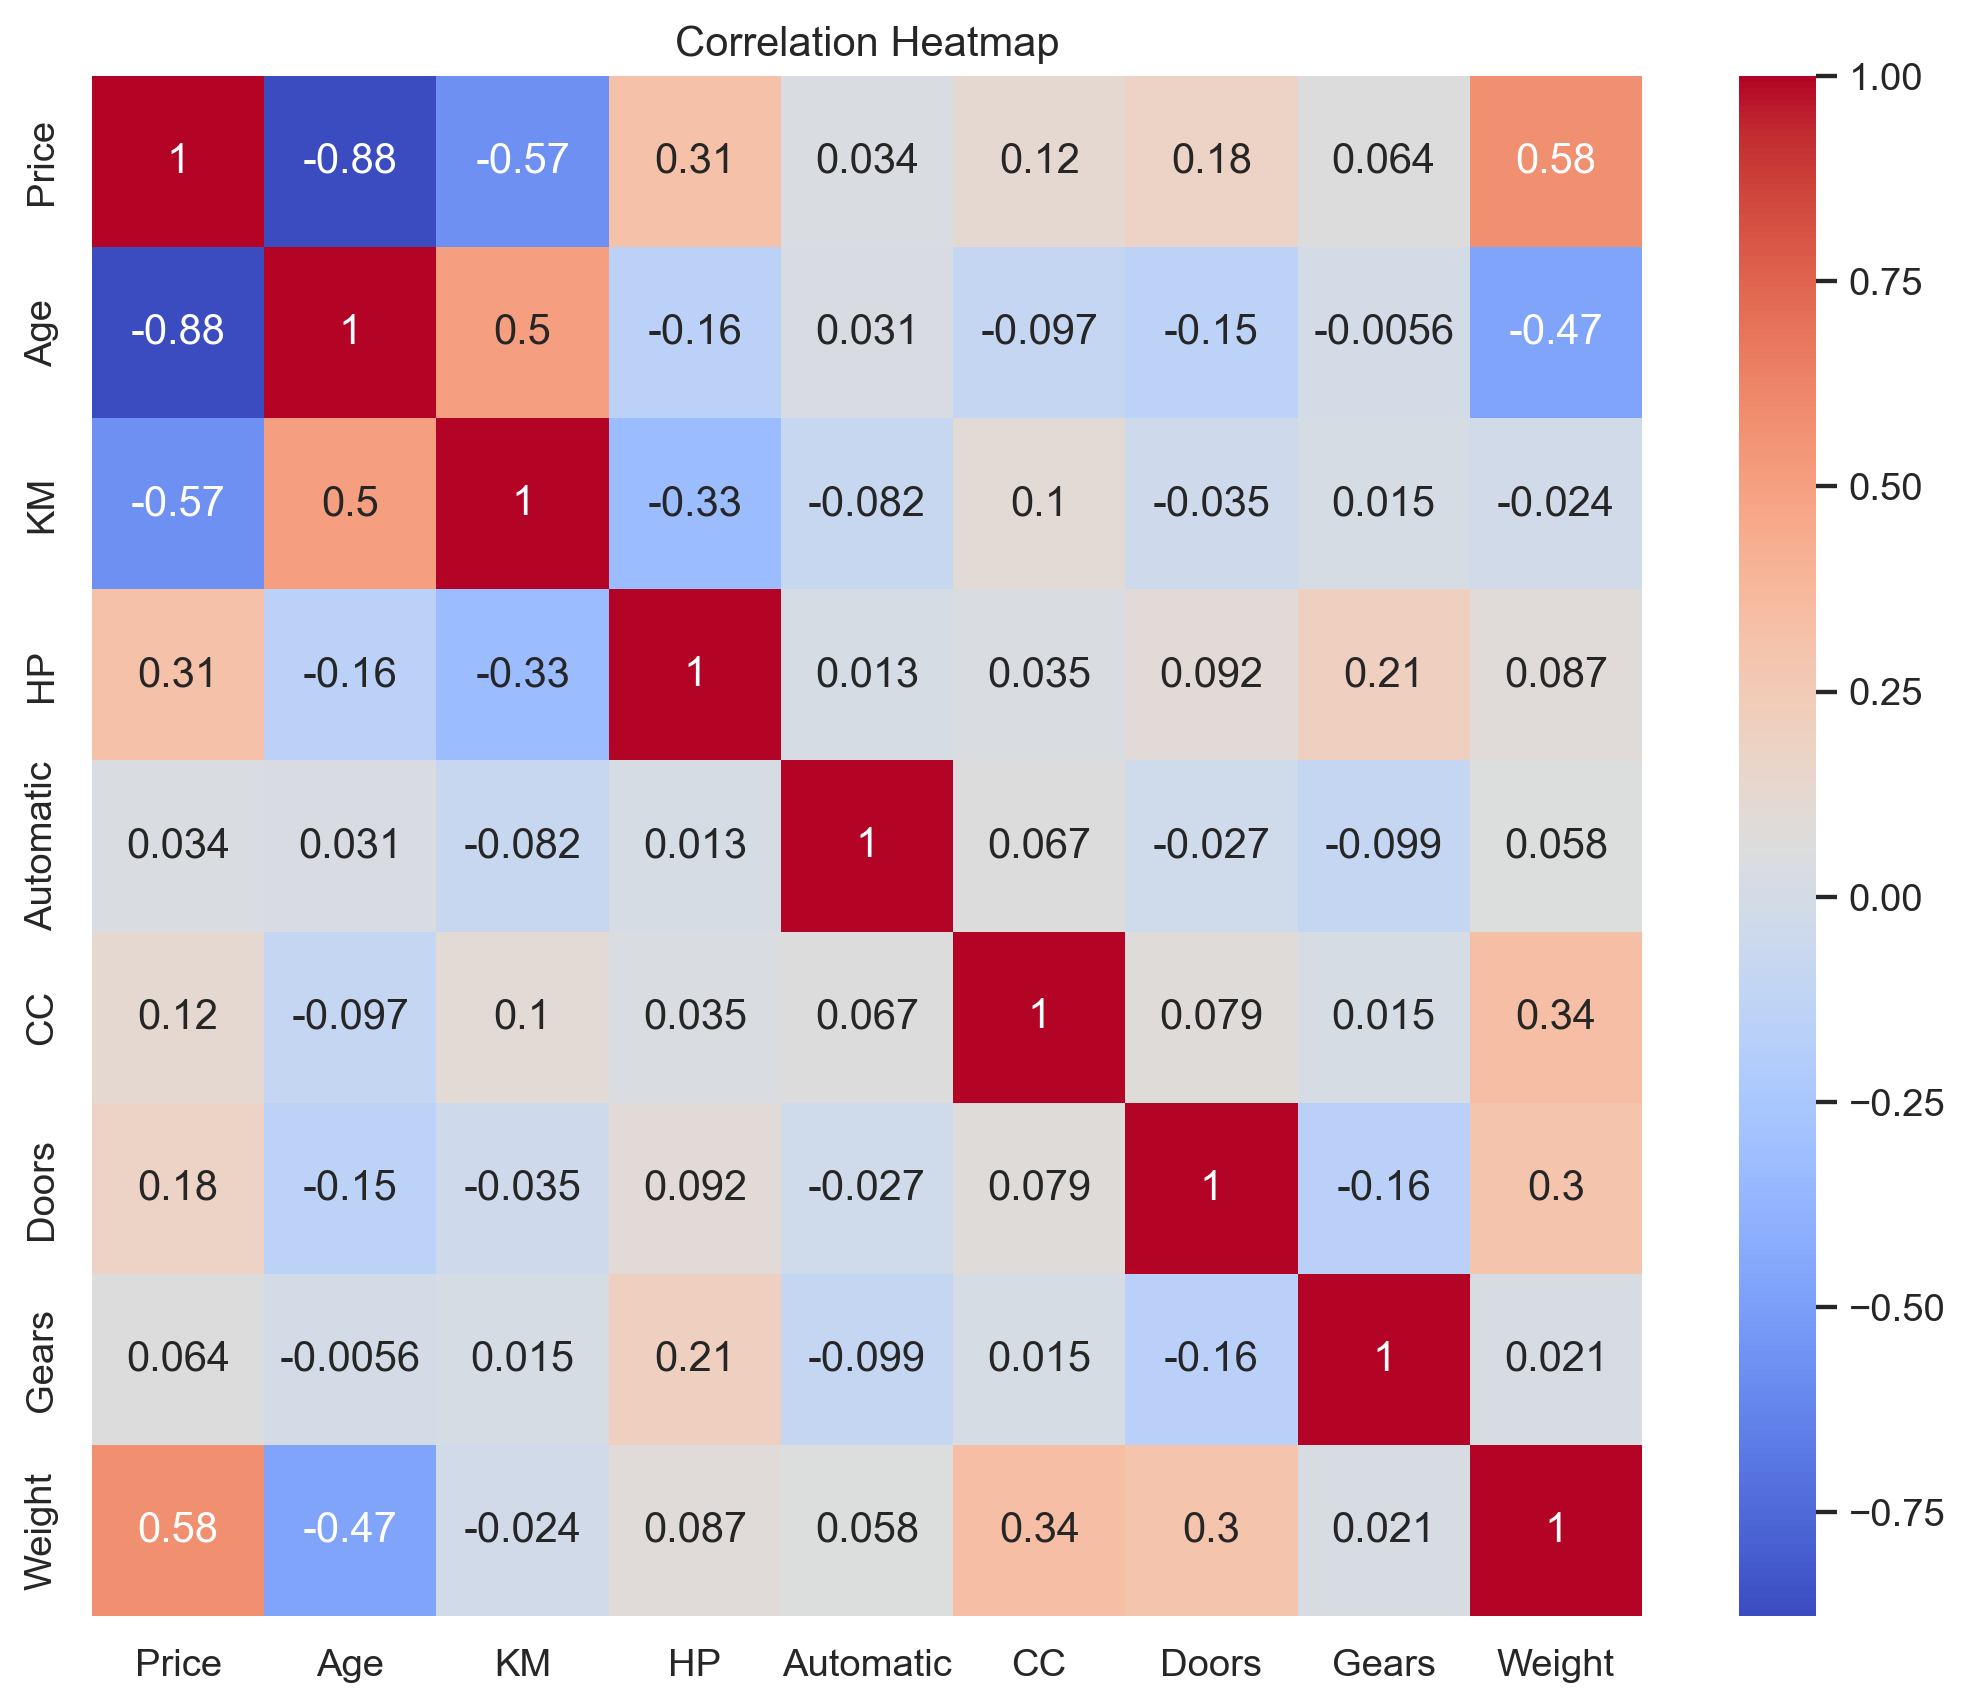

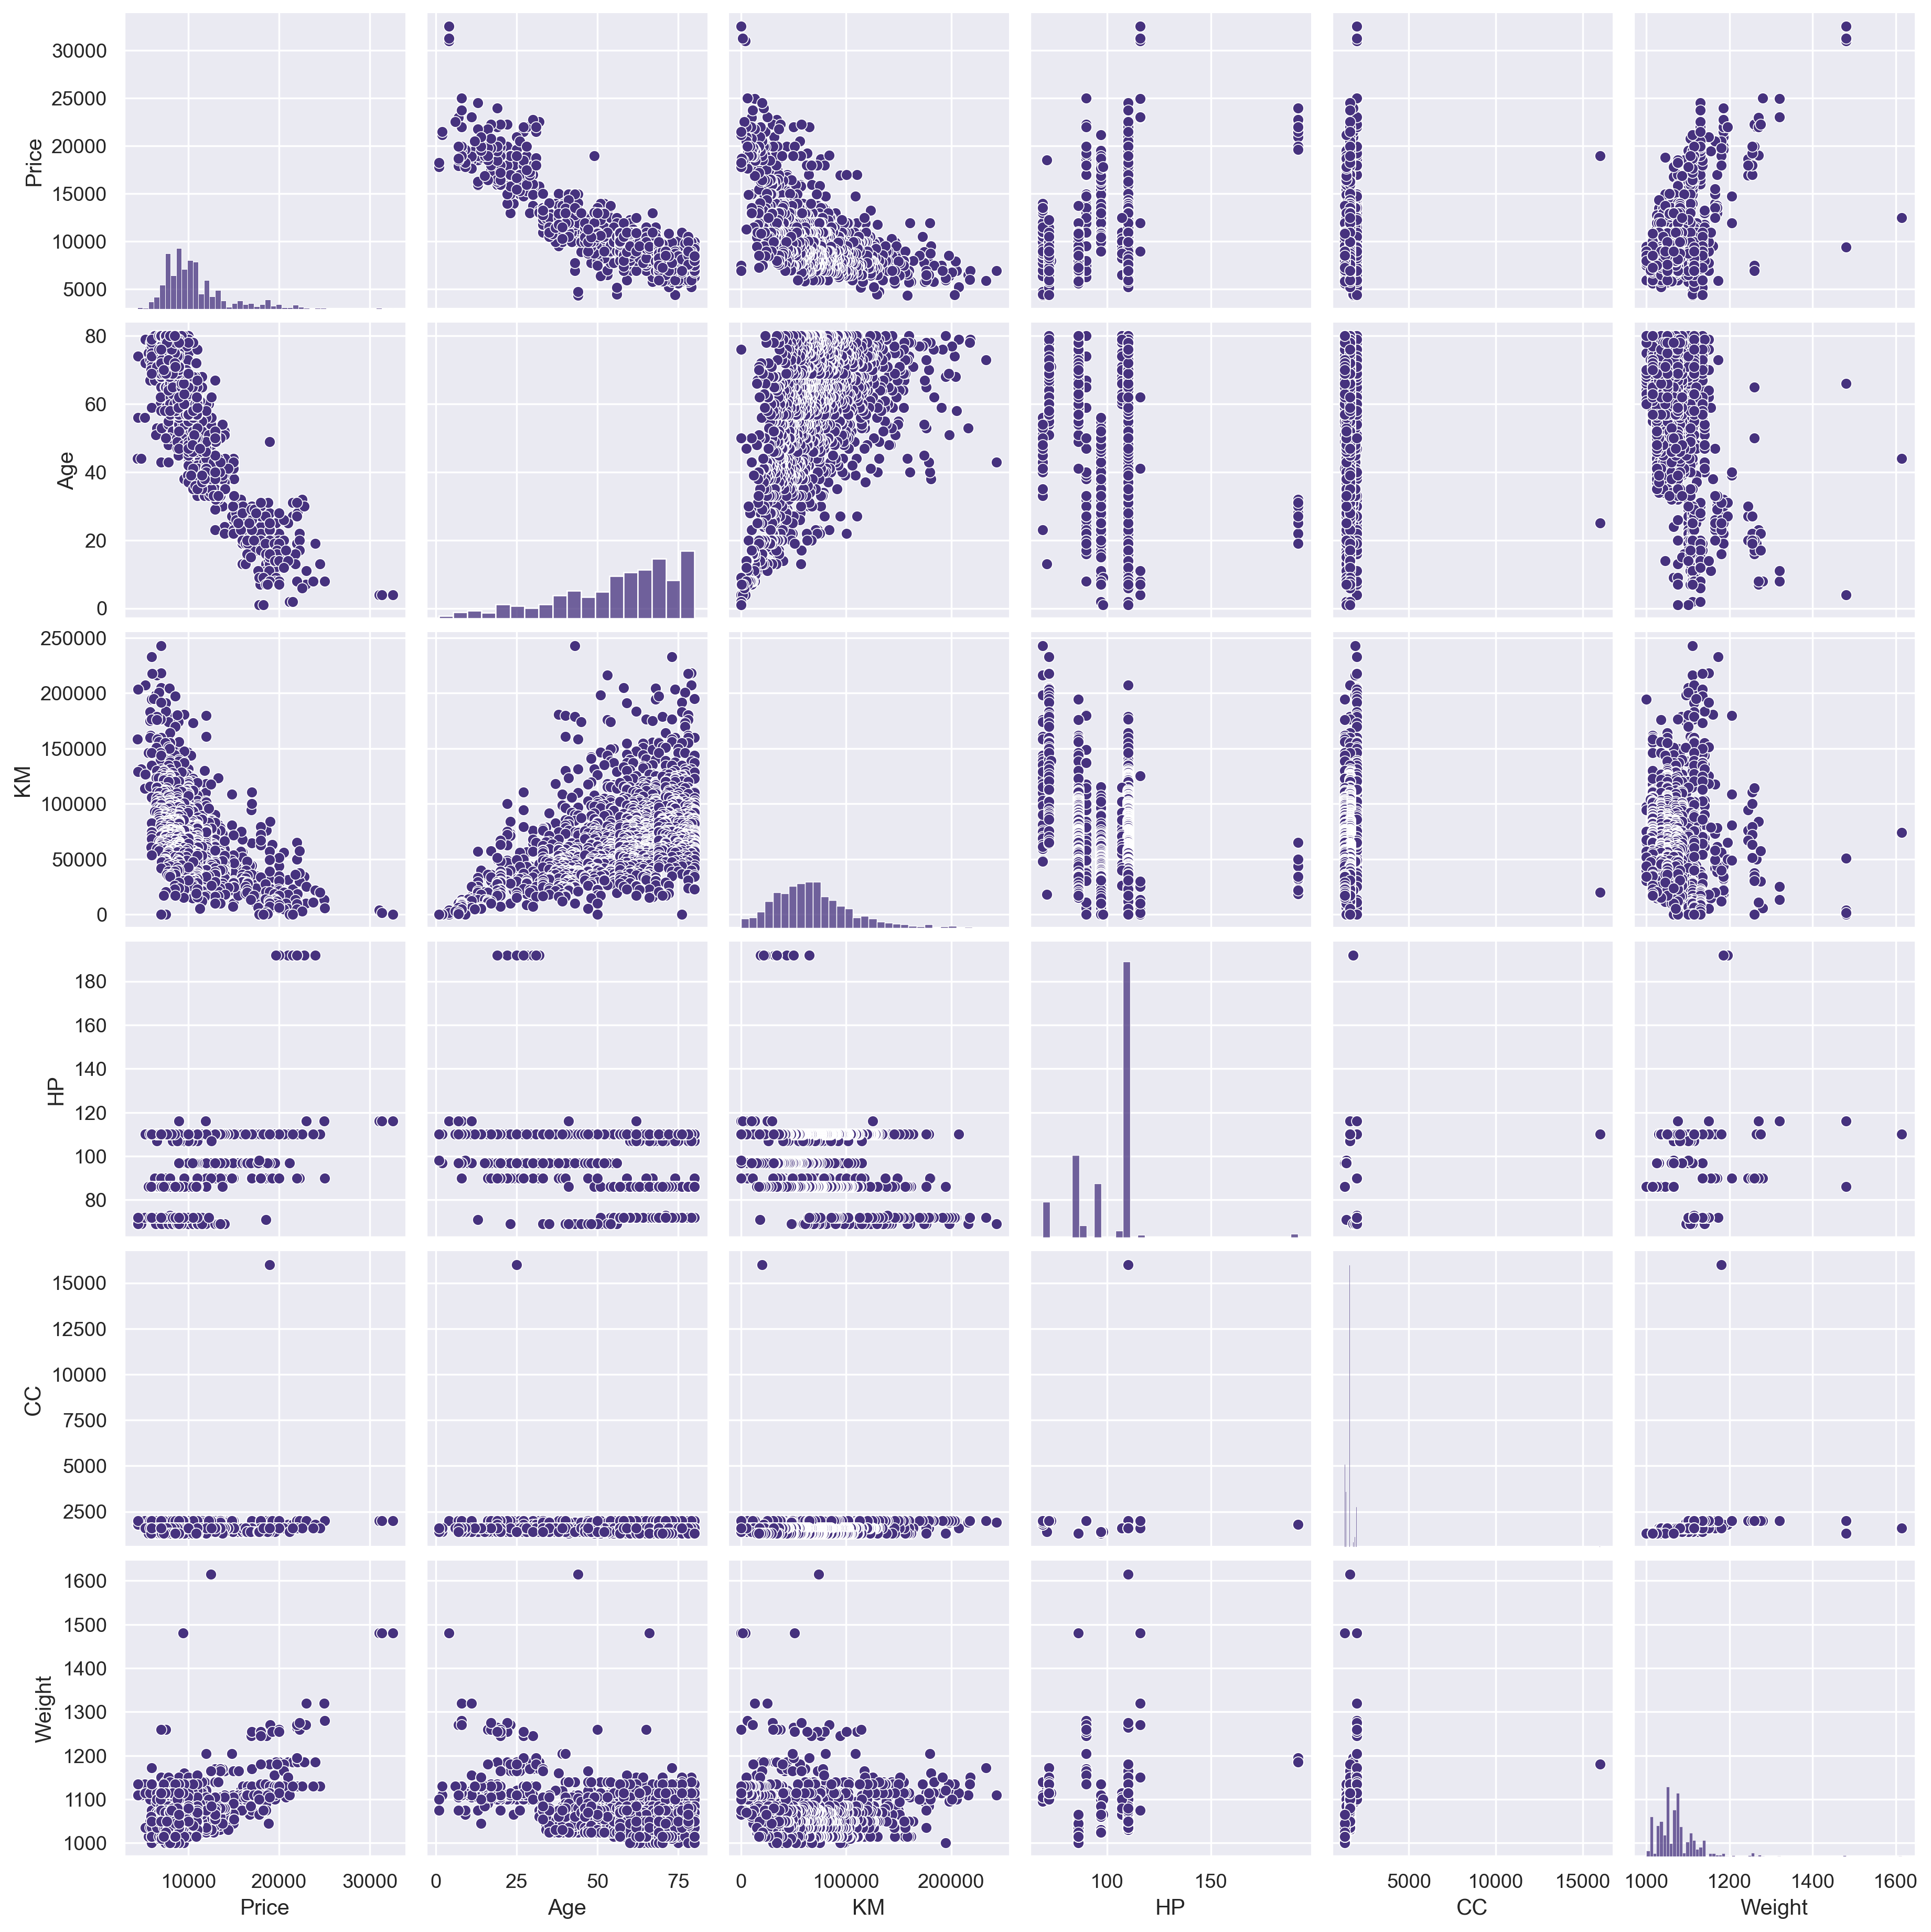

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(df[['Price', 'Age', 'KM', 'HP', 'CC', 'Weight']])


In [14]:
cat_cols = df.select_dtypes(object).columns
cat_cols

Index(['Fuel'], dtype='object')

In [15]:
#Encoding to convert categorical columns into integer values
oe = OrdinalEncoder() 
df[cat_cols] = oe.fit_transform(df[cat_cols])

In [16]:
df

,Price,Age,KM,Fuel,HP,Automatic,CC,Doors,Gears,Weight
0,13500,23,46986,1.0,90,0,2000,3,5,1165
1,13750,23,72937,1.0,90,0,2000,3,5,1165
2,13950,24,41711,1.0,90,0,2000,3,5,1165
3,14950,26,48000,1.0,90,0,2000,3,5,1165
4,13750,30,38500,1.0,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2.0,86,0,1300,3,5,1025
1432,10845,72,19000,2.0,86,0,1300,3,5,1015
1433,8500,71,17016,2.0,86,0,1300,3,5,1015
1434,7250,70,16916,2.0,86,0,1300,3,5,1015


In [17]:
x = df.iloc[:,1:]
y = df['Price']

In [18]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size = 0.2, random_state= 42)

# Model Building

In [20]:
import statsmodels.formula.api as smf 

In [21]:
M1 = smf.ols('Price~Age+KM+Fuel+HP+Automatic+CC+Doors+Weight+Gears',data=df).fit()
M1.params

Intercept   -9703.559472
Age          -123.851768
KM             -0.017445
Fuel          583.485698
HP             23.594086
Automatic     306.857317
CC             -0.054593
Doors         -29.023857
Weight         20.620079
Gears         625.536065
dtype: float64

In [22]:
M1.rsquared

0.8637631991967276

In [23]:
M1.pvalues

Intercept     7.590208e-11
Age          3.728000e-293
KM            4.560948e-38
Fuel          7.138133e-05
HP            4.796786e-16
Automatic     5.306234e-02
CC            5.436426e-01
Doors         4.719094e-01
Weight        2.384319e-79
Gears         1.567914e-03
dtype: float64

# Calculating VIF
- To check multicollinearity

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [26]:
data = df.drop(columns=['Price'])
data

,Age,KM,Fuel,HP,Automatic,CC,Doors,Gears,Weight
0,23,46986,1.0,90,0,2000,3,5,1165
1,23,72937,1.0,90,0,2000,3,5,1165
2,24,41711,1.0,90,0,2000,3,5,1165
3,26,48000,1.0,90,0,2000,3,5,1165
4,30,38500,1.0,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...
1431,69,20544,2.0,86,0,1300,3,5,1025
1432,72,19000,2.0,86,0,1300,3,5,1015
1433,71,17016,2.0,86,0,1300,3,5,1015
1434,70,16916,2.0,86,0,1300,3,5,1015


In [27]:
vif = pd.DataFrame()

In [28]:
vif['features'] =data.columns

In [29]:
vif['Vif'] =  [VIF(data,i) for i in range (len(data.columns))]

In [30]:
vif

,features,Vif
0,Age,17.068408
1,KM,8.455278
2,Fuel,49.229999
3,HP,66.454137
4,Automatic,1.122593
5,CC,17.284782
6,Doors,22.445801
7,Gears,524.954534
8,Weight,465.439892


In [31]:
M2 = smf.ols('Price~Age+KM+Fuel+HP+Automatic+CC+Doors+Gears',data = df).fit()
M2.rsquared

0.8251161706643262

In [32]:
M3 = smf.ols('Price~Age+KM+Fuel+HP+Automatic+CC+Doors+Weight',data = df).fit()
M3.rsquared

0.8628037356828113

#  Model Validation Technique("Error Assumption")

In [34]:
Model = smf.ols('Price~Age+KM+Fuel+HP+Automatic+CC+Doors+Weight',data = df).fit()
Model.rsquared

0.8628037356828113

In [35]:
Model.fittedvalues  #Predicted values

0       16309.851543
1       15866.834591
2       16275.970839
3       15920.746040
4       15691.582379
            ...     
1431     8685.898478
1432     8131.689169
1433     8289.490341
1434     8415.129209
1435    10508.225343
Length: 1435, dtype: float64

In [36]:
Model.resid  # Actual values - Predicted values = Error 

0      -2809.851543
1      -2116.834591
2      -2325.970839
3       -970.746040
4      -1941.582379
           ...     
1431   -1185.898478
1432    2713.310831
1433     210.509659
1434   -1165.129209
1435   -3558.225343
Length: 1435, dtype: float64

<Axes: ylabel='Count'>

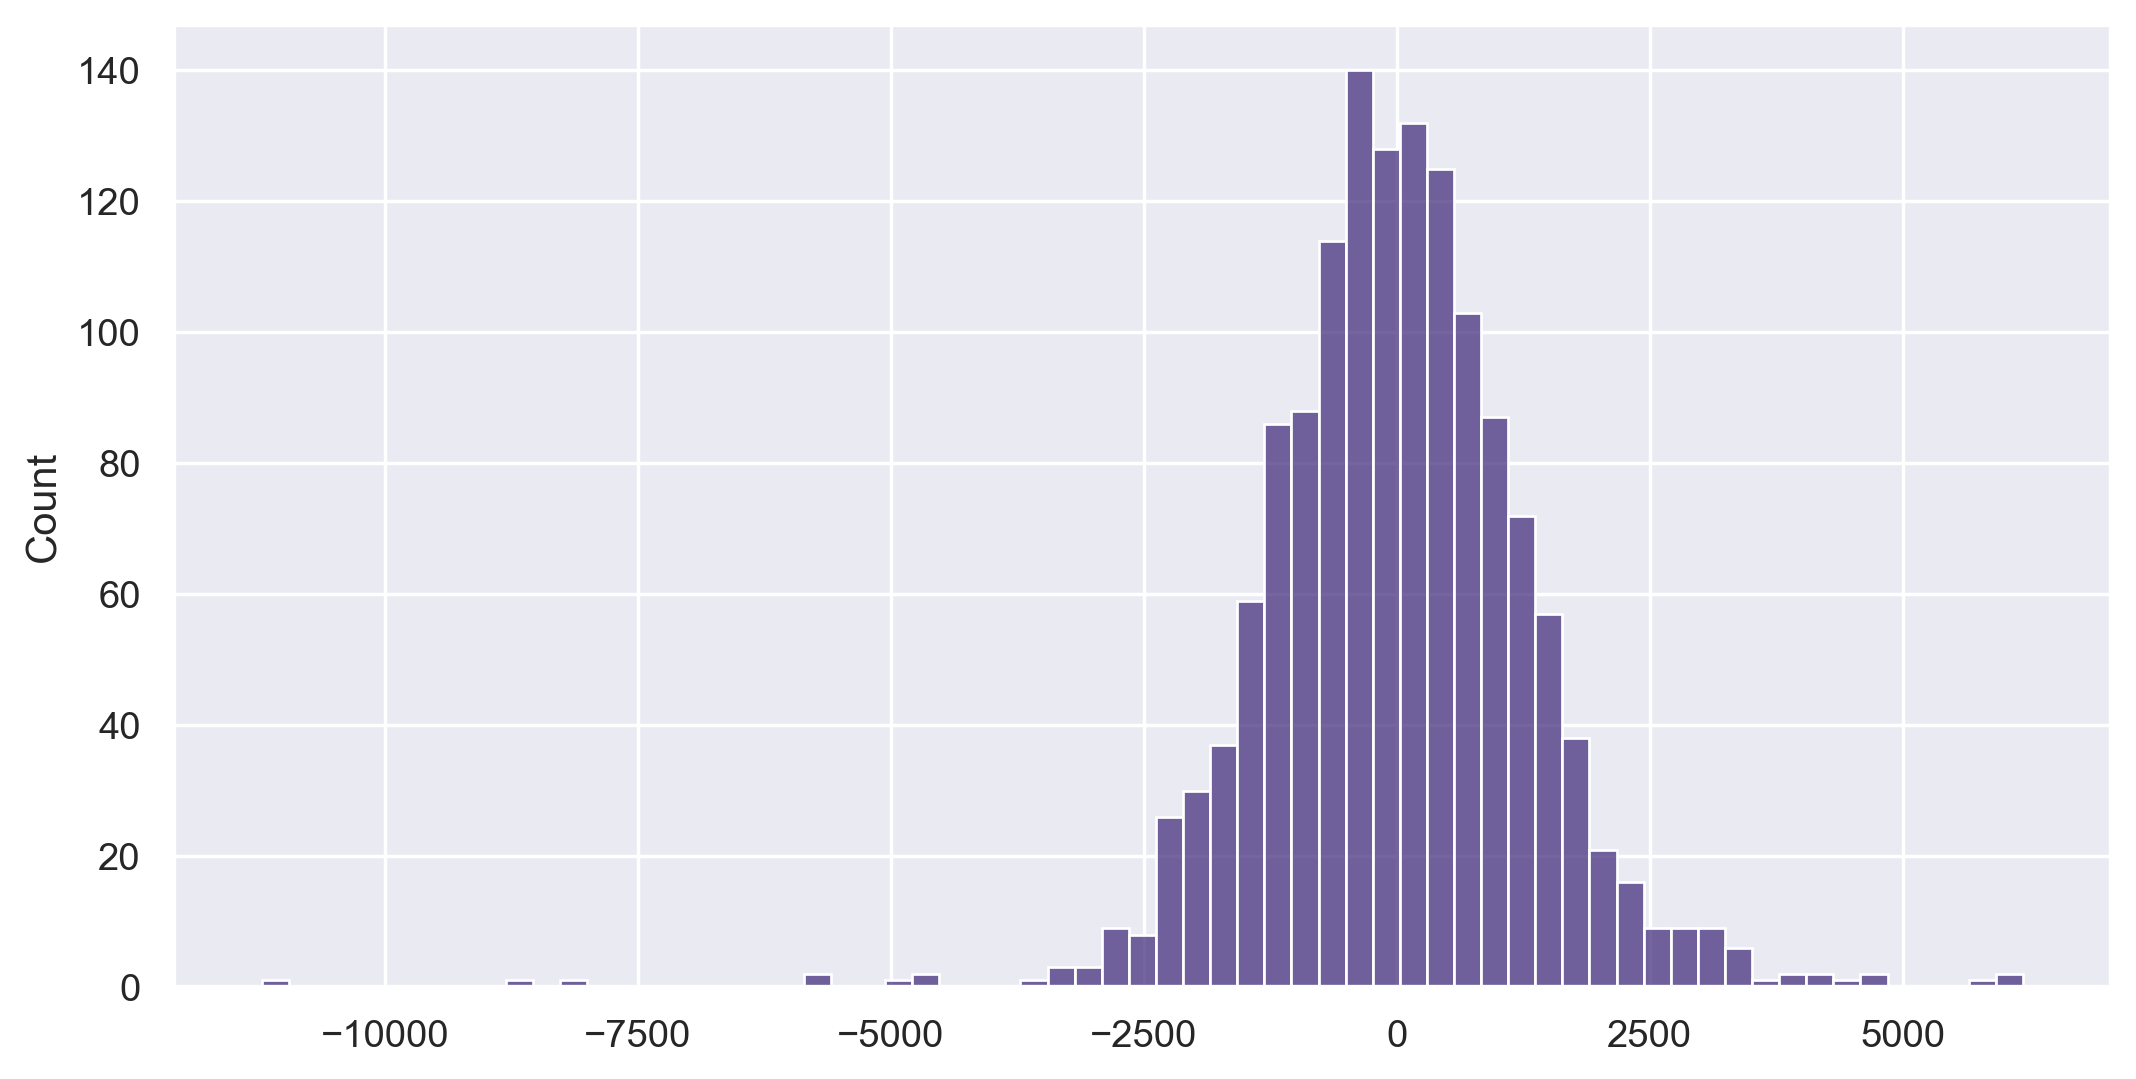

In [37]:
sns.histplot(Model.resid)

Text(0, 0.5, 'Error Values')

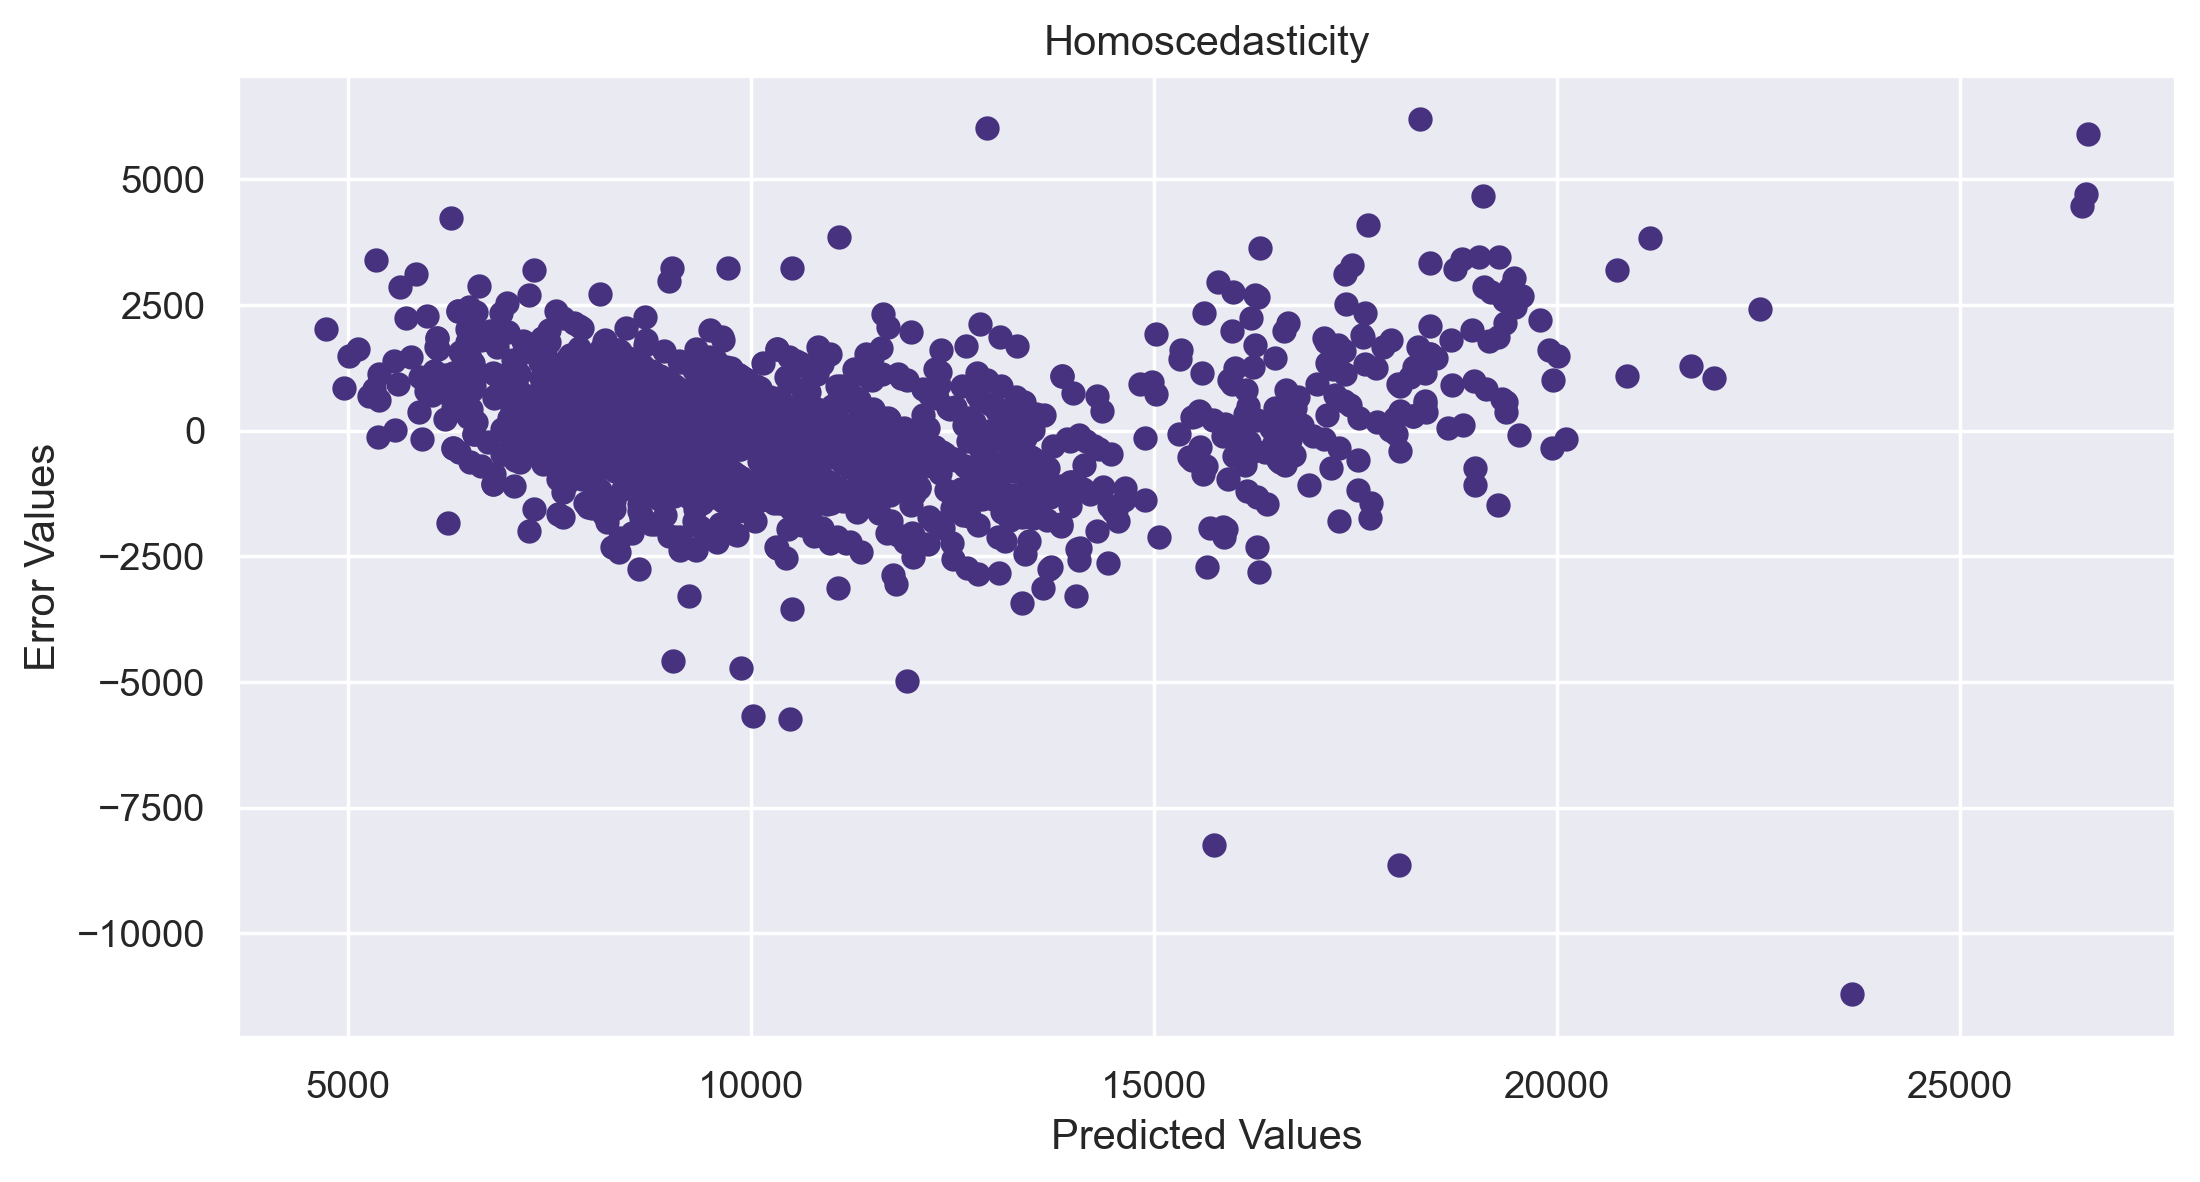

In [38]:
plt.scatter(Model.fittedvalues,Model.resid)
plt.title('Homoscedasticity')
plt.xlabel('Predicted Values')
plt.ylabel('Error Values')

# Model Deletion Diagnostics ( Cook's Distance)

In [40]:
inf = Model.get_influence()

In [41]:
c,p = inf.cooks_distance

In [42]:
df["Cook's Distance"] = c
df

,Price,Age,KM,Fuel,HP,Automatic,CC,Doors,Gears,Weight,Cook's Distance
0,13500,23,46986,1.0,90,0,2000,3,5,1165,0.004189
1,13750,23,72937,1.0,90,0,2000,3,5,1165,0.002199
2,13950,24,41711,1.0,90,0,2000,3,5,1165,0.002950
3,14950,26,48000,1.0,90,0,2000,3,5,1165,0.000486
4,13750,30,38500,1.0,90,0,2000,3,5,1170,0.002103
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2.0,86,0,1300,3,5,1025,0.000527
1432,10845,72,19000,2.0,86,0,1300,3,5,1015,0.003051
1433,8500,71,17016,2.0,86,0,1300,3,5,1015,0.000019
1434,7250,70,16916,2.0,86,0,1300,3,5,1015,0.000557


In [43]:
df[df["Cook's Distance"]>1] # Pandas filtering

,Price,Age,KM,Fuel,HP,Automatic,CC,Doors,Gears,Weight,Cook's Distance
80,18950,25,20019,2.0,110,1,16000,5,5,1180,23.310172
221,12450,44,74172,2.0,110,0,1600,5,5,1615,1.808114


Text(0.5, 0, 'Index')

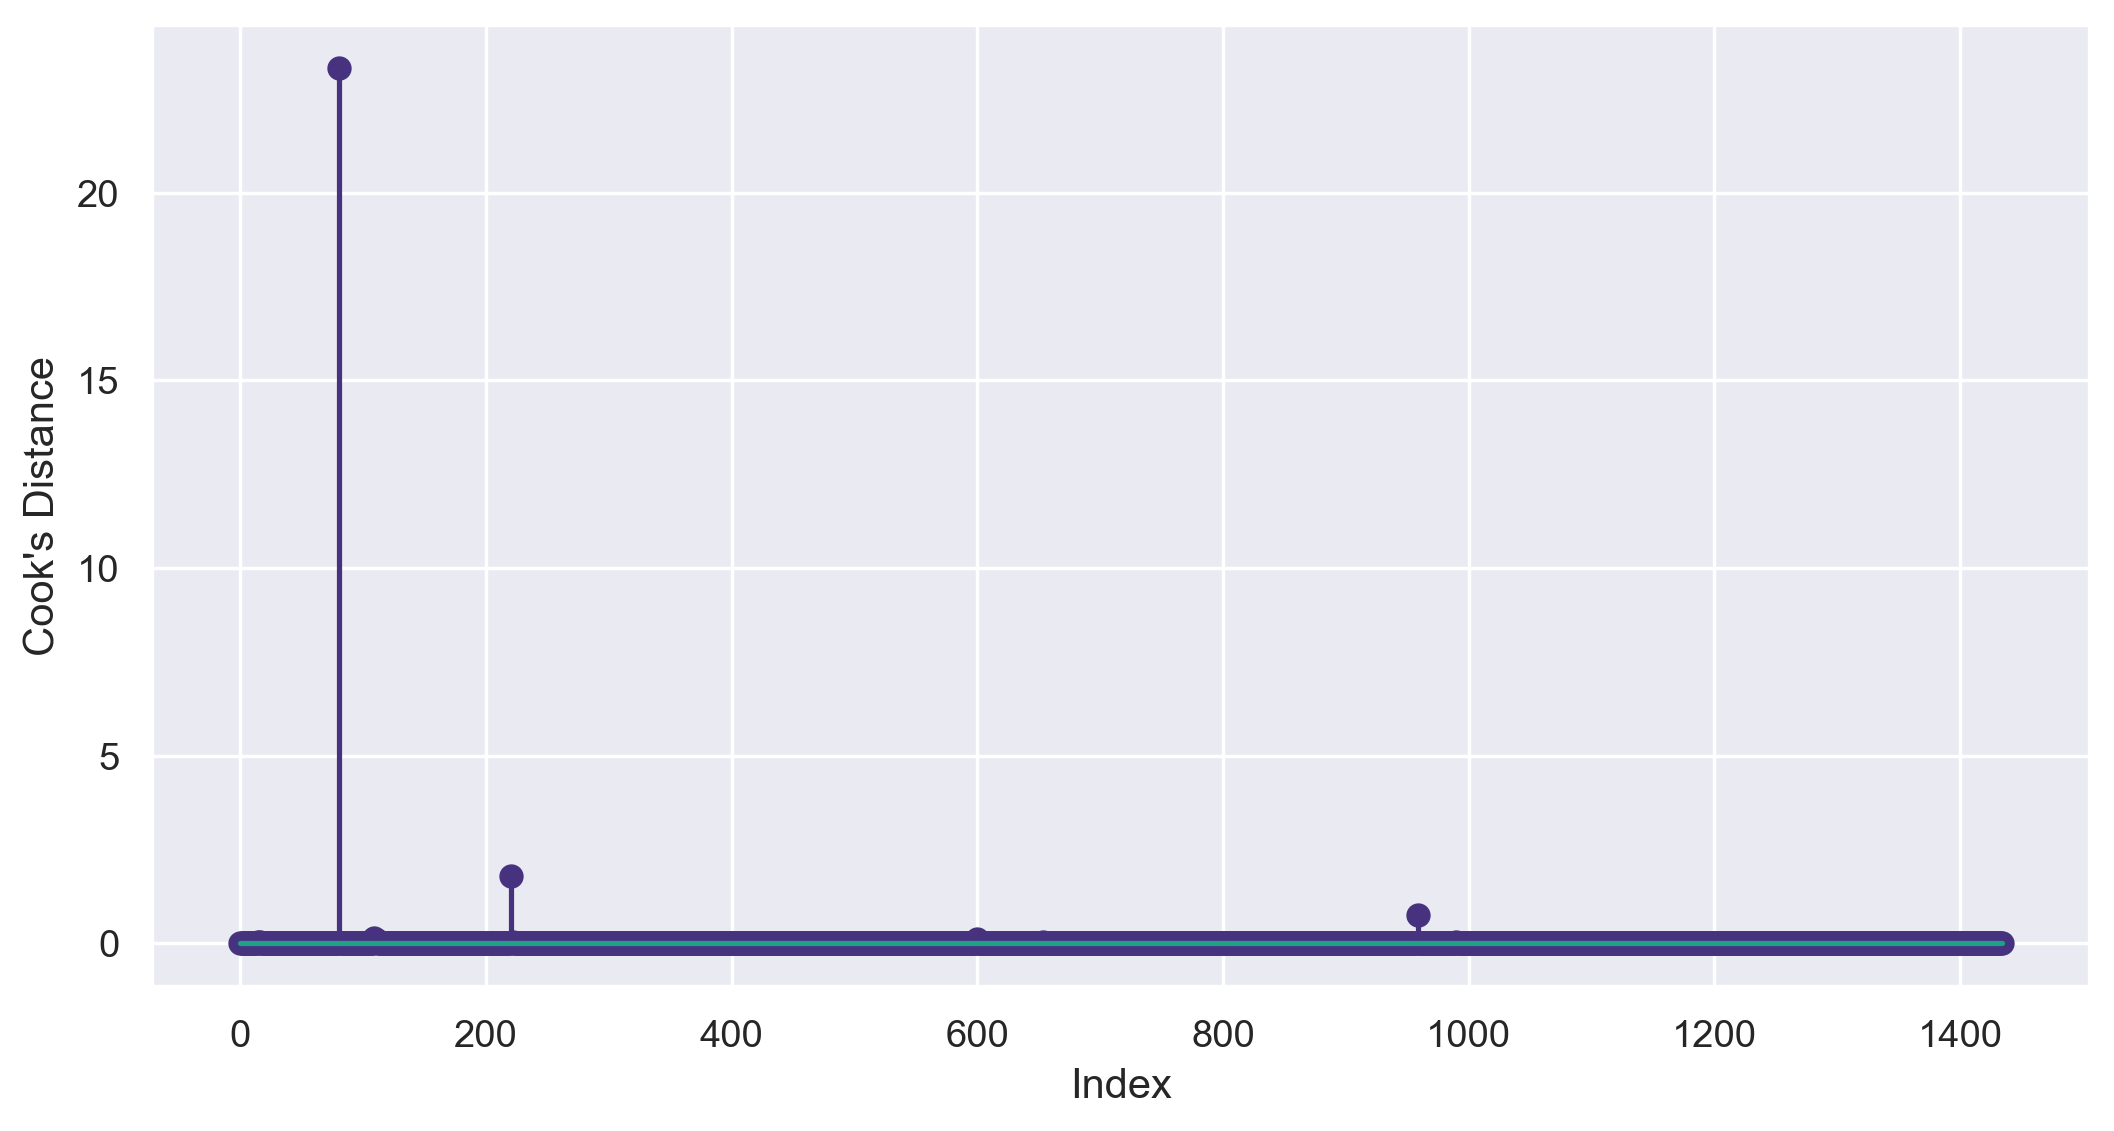

In [44]:
plt.stem(c)
plt.ylabel("Cook's Distance")
plt.xlabel("Index")

# Model Improving

In [46]:
df.drop(index = {80,221}, inplace = True)

In [47]:
df.reset_index(inplace = True)

In [48]:
df.drop(columns = ['index'])

,Price,Age,KM,Fuel,HP,Automatic,CC,Doors,Gears,Weight,Cook's Distance
0,13500,23,46986,1.0,90,0,2000,3,5,1165,0.004189
1,13750,23,72937,1.0,90,0,2000,3,5,1165,0.002199
2,13950,24,41711,1.0,90,0,2000,3,5,1165,0.002950
3,14950,26,48000,1.0,90,0,2000,3,5,1165,0.000486
4,13750,30,38500,1.0,90,0,2000,3,5,1170,0.002103
...,...,...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,2.0,86,0,1300,3,5,1025,0.000527
1429,10845,72,19000,2.0,86,0,1300,3,5,1015,0.003051
1430,8500,71,17016,2.0,86,0,1300,3,5,1015,0.000019
1431,7250,70,16916,2.0,86,0,1300,3,5,1015,0.000557


In [49]:
Model.rsquared

0.8628037356828113

In [50]:
Final_Model = smf.ols('Price~Age+KM+Fuel+HP+Automatic+CC+Doors+Weight',data = df).fit()
Final_Model.rsquared

0.8740171146807441

# Regularization Technique to increase Performance 
- Lasso(l1)
- Ridge(l2)

In [52]:
# Lasso 
l1 = Lasso(alpha =75 )
l1.fit(xtrain,ytrain)
l1.score(xtrain,ytrain), l1.score(xtest,ytest)

(0.865206944205252, 0.8382010637369504)

In [53]:
# Ridge
l2 = Ridge()
l2.fit(xtrain,ytrain)
l2.score(xtrain,ytrain), l2.score(xtest,ytest)

(0.8694826099316127, 0.8328931755571491)

# Coefficient Interpretations

In [55]:
Final_Model = smf.ols('Price~Age+KM+Fuel+HP+Automatic+CC+Doors+Weight',data = df).fit()
Final_Model.params

Intercept   -12344.362960
Age           -118.612107
KM              -0.015156
Fuel           528.752760
HP              28.459004
Automatic       22.195676
CC              -2.034184
Doors         -110.786552
Weight          28.453448
dtype: float64

In [56]:
coefficients = pd.DataFrame({'Feature': x.columns, 'Coefficient': Final_Model.params})
print(coefficients)

             Feature   Coefficient
Intercept        Age -12344.362960
Age               KM   -118.612107
KM              Fuel     -0.015156
Fuel              HP    528.752760
HP         Automatic     28.459004
Automatic         CC     22.195676
CC             Doors     -2.034184
Doors          Gears   -110.786552
Weight        Weight     28.453448


In [57]:
Final_Model.pvalues

Intercept     5.375731e-22
Age          5.947237e-286
KM            7.784921e-31
Fuel          8.575787e-04
HP            3.710326e-22
Automatic     8.845639e-01
CC            8.329729e-11
Doors         3.780346e-03
Weight       4.678769e-105
dtype: float64

In [58]:
# Here the model is generalized model with an rsquared value of 87.40%
# we also performed Regularization Techniques

# Interview Questions:
- What is Normalization & Standardization and how is it helpful?
- What techniques can be used to address multicollinearity in multiple linear regression?


# What is Normalization & Standardization and how is it helpful?
- Normalization : Normalization is a scaling technique in which values are shifted and rescaled so that thy end up in ranging between o and 1.
It is also known as Min-Max scaling.
- Standardization: Standardization is scaling technique where the values are cantered around the mean with a unit standard deviation.
- Normalization and Standardization are Feature scaling techniues used to reduce the time for model building process and scale the large values to small decimal values. 


# What techniques can be used to address multicollinearity in multiple linear regression?
Following are the techniques which can be used to address multicollinearity in multiple linear regression: 
- Variance Inflation Factor
- Scatter Plot
- Correlation
- Domain Knowledge